<a href="https://colab.research.google.com/github/abxda/NoticiasAguascalientes/blob/main/NoticiasDeAguascalientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install GoogleNews
!pip install newspaper3k
!pip install nltk
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from GoogleNews import GoogleNews
from datetime import datetime, timedelta

# Definir la cadena de búsqueda, idioma y zona horaria
search_string = "Aguascalientes México noticias"
language = "es"
timezone = "America/Mexico_City"

# Crear una instancia de GoogleNews
gn = GoogleNews(lang=language, region='mx')

# Definir la fecha de inicio y fin
start_date = datetime.strptime("2023-04-10", "%Y-%m-%d").date()
end_date = datetime.strptime("2023-04-13", "%Y-%m-%d").date()

# Configurar los parámetros de búsqueda
gn.search(search_string)
gn.set_time_range(start_date.strftime('%m/%d/%Y'), end_date.strftime('%m/%d/%Y'))
gn.get_page(1)
results = gn.results(sort=True)

# Imprimir los títulos de las noticias encontradas
for result in results:
    print(result['link'])




https://support.google.com/websearch/answer/106230?hl=es
https://heraldodemexico.com.mx/nacional/2023/4/13/aguascalientes-zacatecas-firman-convenio-de-seguridad-interestatal-497399.html
https://www.elsoldelcentro.com.mx/policiaca/detienen-a-cuatro-presuntos-secuestradores-en-aguascalientes-9911371.html
https://www.elsoldelcentro.com.mx/local/fomentan-acciones-de-prevencion-en-escuelas-de-aguascalientes-9910984.html
https://www.elsoldelcentro.com.mx/finanzas/repunta-el-sector-de-la-construccion-en-aguascalientes-9910485.html
https://www.elsoldelcentro.com.mx/analisis/atalaya-del-13-de-abril-de-2023-9909968.html
https://www.elsoldelcentro.com.mx/deportes/baloncesto/panteras-de-aguascalientes-femenil-suma-a-jade-giron-9906718.html
http://www.centuria.mx/mexico-cancela-la-propuesta-de-cabotaje-en-aeropuertos-nacionales/
https://www.elsoldelcentro.com.mx/local/empresarios-de-aguascalientes-confian-en-una-fnsm-segura-9905287.html
https://www.elsoldelcentro.com.mx/deportes/taekwondoines-aguas

In [18]:
result

{'title': 'Asesinaron a 506 personas durante la Semana Santa en ...',
 'media': 'Aristegui Noticias',
 'date': 'Hace 3 días',
 'datetime': nan,
 'desc': 'Entre el 1 y 7 de abril, fueron asesinadas 506 personas en México, coincidentemente ... Tlaxcala tuvo un solo suceso al igual que Aguascalientes, Durango,...',
 'link': 'https://aristeguinoticias.com/1004/mexico/asesinaron-a-506-personas-durante-la-semana-santa-en-mexico/',
 'img': 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw=='}

In [27]:
from GoogleNews import GoogleNews
from datetime import datetime, timedelta
import newspaper

# Definir la cadena de búsqueda, idioma y zona horaria
search_string = "Aguascalientes México noticias"
language = "es"
timezone = "America/Mexico_City"

# Crear una instancia de GoogleNews
gn = GoogleNews(lang=language, region='mx')

# Definir la fecha de inicio y fin
start_date = datetime.strptime("2023-04-10", "%Y-%m-%d").date()
end_date = datetime.strptime("2023-04-13", "%Y-%m-%d").date()

# Configurar los parámetros de búsqueda
gn.search(search_string)
gn.set_time_range(start_date.strftime('%m/%d/%Y'), end_date.strftime('%m/%d/%Y'))

# Determinar el número de páginas a descargar
gn.get_page(1)
total_count = gn.total_count()
num_pages = total_count // 50 + (total_count % 50 > 0)

# Imprimir el número total de noticias encontradas y el número de páginas a descargar
print(f"Se encontraron {total_count} noticias.")
print(f"Se descargarán {num_pages} páginas.")

# Descargar las noticias y guardar el texto en un archivo
counter = 0
with open("noticias.txt", "w") as f:
    for i in range(1, num_pages+1):
        gn.get_page(i)
        results = gn.results(sort=True)
        for result in results:
            if counter == 100:
                break
            try:
                article = newspaper.Article(result['link'], language='es')
                article.download()
                article.parse()
                text = article.text.replace("\n", " ")
                f.write(text + "\n")
                print(text)
                counter += 1
            except Exception as e:
                print("Error al procesar la noticia:", e)




Se encontraron 7 noticias.
Se descargarán 1 páginas.
Con la función Autocompletar, puedes introducir búsquedas en Google de forma más rápida. Puedes desactivar o quitar algunas predicciones de autocompletar, o informar de problemas con las predicciones. Más información sobre la función Autocompletar  Desactivar la función Resultados personales  Importante: Si la función Resultados personales está desactivada, no recibirás predicciones ni recomendaciones personalizadas basadas en tus búsquedas anteriores. Si tienes activada la opción Actividad en la Web y en Aplicaciones, el historial de búsqueda se guarda en tu cuenta de Google y se utiliza para ofrecerte experiencias más personalizadas en otros servicios de Google. Consulta cómo buscar y controlar los datos de Actividad en la Web y en Aplicaciones.  Si has iniciado sesión en tu cuenta de Google y has activado la función Resultados personales, es posible que también recibas predicciones y recomendaciones personalizadas en la Búsqueda d

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


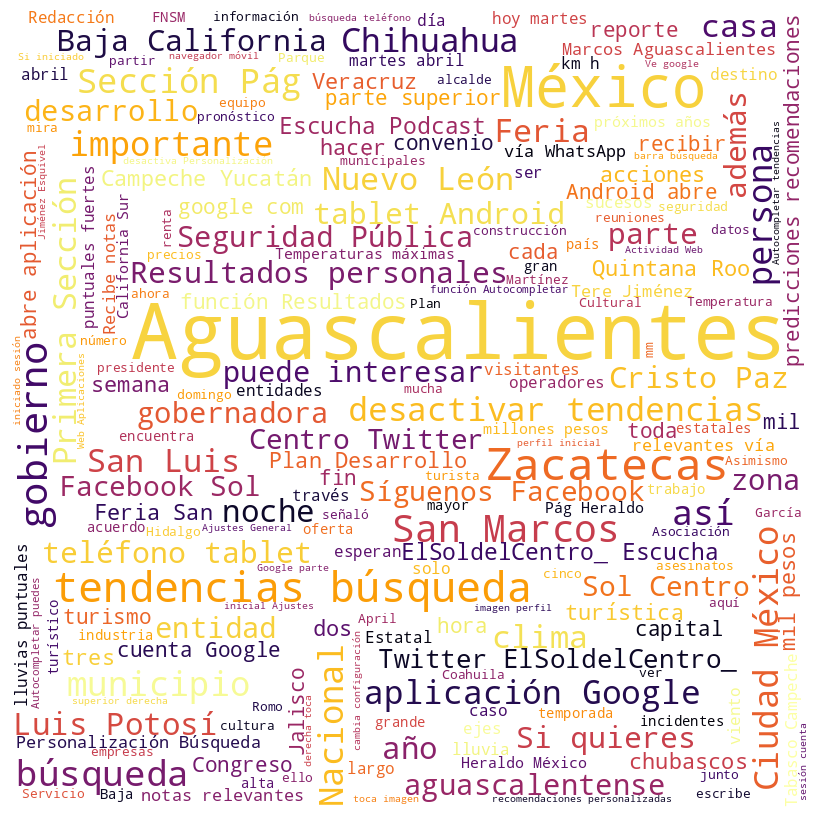

In [29]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Descargar las stopwords en español de NLTK
nltk.download('stopwords')
nltk.download('punkt')
# Leer el archivo noticias.txt y cargar su contenido en una variable de texto
with open('noticias.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Eliminar las stopwords en español del texto utilizando NLTK
stop_words = set(stopwords.words('spanish'))
word_tokens = nltk.word_tokenize(text)
filtered_text = [word for word in word_tokens if word.lower() not in stop_words]

# Unir las palabras filtradas en una sola cadena de texto
filtered_text_str = " ".join(filtered_text)

# Generar la nube de palabras con WordCloud
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='inferno', stopwords=stop_words).generate(filtered_text_str)

# Mostrar la nube de palabras
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
